In [1]:
import pandas as pd

In [2]:
# read csv from data/who folder
micro_pos = pd.read_csv('../data/who/MALARIA_MICR_POS.csv')
micro_test = pd.read_csv('../data/who/MALARIA_MICR_TEST.csv')
rdt_pos = pd.read_csv('../data/who/MALARIA_RDT_POS.csv')
rdt_test = pd.read_csv('../data/who/MALARIA_RDT_TEST.csv')

susp = pd.read_csv('../data/who/MALARIA_SUSPECTS.csv')


In [3]:
micro_pos.columns

Index(['Id', 'IndicatorCode', 'SpatialDimension', 'SpatialDimensionValueCode',
       'TimeDimension', 'TimeDim', 'DisaggregatingDimension1',
       'DisaggregatingDimension1ValueCode', 'DisaggregatingDimension2',
       'DisaggregatingDimension2ValueCode', 'DisaggregatingDimension3',
       'DisaggregatingDimension3ValueCode', 'DataSourceDimension',
       'DataSourceDimensionValueCode', 'Value', 'NumericValue', 'Low', 'High',
       'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd'],
      dtype='object')

In [4]:
# tmp dataframe = merge micro_pos and micro_test on 'SpatialDimensionValueCode' and 'TimeDim', keep only 'NumericValue' column
tmp = pd.merge(micro_pos, micro_test, on=['SpatialDimensionValueCode', 'TimeDim'], how='inner')[['SpatialDimensionValueCode', 'TimeDim', 'NumericValue_x', 'NumericValue_y']]
tmp.head()

,SpatialDimensionValueCode,TimeDim,NumericValue_x,NumericValue_y
0,AGO,2010,1324264,1947349
1,AGO,2011,1147473,1765933
2,AGO,2012,1056563,2245223
3,AGO,2013,1462941,3025258
4,AGO,2014,1431313,3398029


In [5]:
tmp['positivity_rate'] = tmp['NumericValue_x'] / tmp['NumericValue_y']
tmp.head()

,SpatialDimensionValueCode,TimeDim,NumericValue_x,NumericValue_y,positivity_rate
0,AGO,2010,1324264,1947349,0.680034
1,AGO,2011,1147473,1765933,0.649783
2,AGO,2012,1056563,2245223,0.470583
3,AGO,2013,1462941,3025258,0.483576
4,AGO,2014,1431313,3398029,0.421219


<AxesSubplot:>

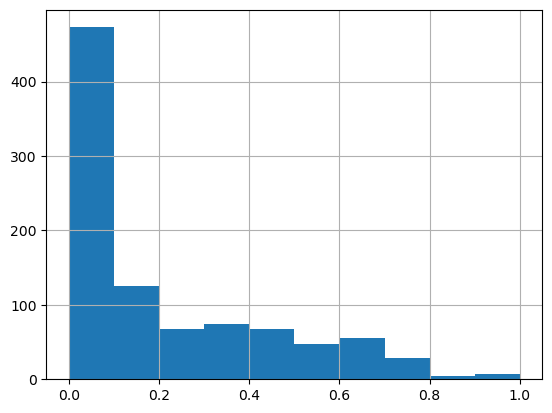

In [6]:
# histogram of positivity rate
tmp['positivity_rate'].hist()

In [7]:
tmp['below_0p1'] = tmp['positivity_rate'] < 0.1
tmp['above_0p75'] = tmp['positivity_rate'] > 0.75

In [8]:
tmp[ tmp.above_0p75 == True ]['SpatialDimensionValueCode'].unique()

array(['BEN', 'CAF', 'COG', 'GNQ', 'LBR', 'MLI', 'NGA', 'TCD', 'TZA',
       'KOR', 'PNG'], dtype=object)

In [9]:
# plot positivity rate for each country where above_0p75 is True
tmp[ tmp.above_0p75 == True ]

,SpatialDimensionValueCode,TimeDim,NumericValue_x,NumericValue_y,positivity_rate,below_0p1,above_0p75
22,BEN,2011,68745,88134,0.780005,False,True
27,BEN,2017,208823,267492,0.780670,False,True
44,CAF,2015,106524,139241,0.765033,False,True
45,CAF,2016,144924,189481,0.764847,False,True
81,COG,2017,127939,153203,0.835095,False,True
187,GNQ,2010,39636,42585,0.930750,False,True
188,GNQ,2011,20601,23004,0.895540,False,True
208,LBR,2011,577641,728443,0.792980,False,True
229,MLI,2019,468011,594303,0.787496,False,True
283,NGA,2019,2476514,3298156,0.750878,False,True


In [10]:
# tmp dataframe = merge micro_pos and micro_test on 'SpatialDimensionValueCode' and 'TimeDim', keep only 'NumericValue' column
tmp_rdt = pd.merge(rdt_pos, rdt_test, on=['SpatialDimensionValueCode', 'TimeDim'], how='inner')[['SpatialDimensionValueCode', 'TimeDim', 'NumericValue_x', 'NumericValue_y']]
tmp_rdt['positivity_rate'] = tmp_rdt['NumericValue_x'] / tmp_rdt['NumericValue_y']
tmp_rdt.head()

,SpatialDimensionValueCode,TimeDim,NumericValue_x,NumericValue_y,positivity_rate
0,AGO,2010,358606,639476,0.560781
1,AGO,2011,484809,833753,0.581478
2,AGO,2012,440271,1069483,0.411667
3,AGO,2013,536927,1103815,0.486428
4,AGO,2014,867666,1855400,0.467644


<AxesSubplot:>

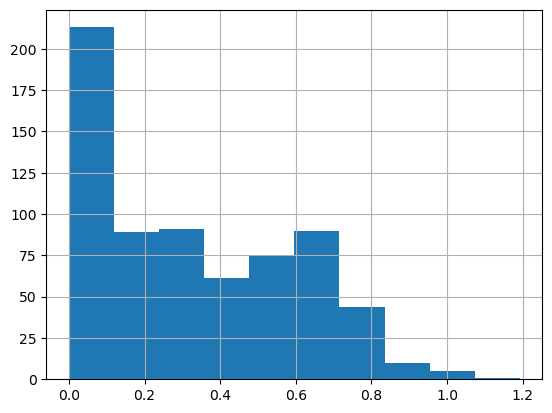

In [11]:
#histogram of positivity rate
tmp_rdt['positivity_rate'].hist()

In [12]:
tmp_rdt[ tmp_rdt.positivity_rate >= 1 ]

,SpatialDimensionValueCode,TimeDim,NumericValue_x,NumericValue_y,positivity_rate
420,ECU,2020,383,383,1.000000
427,GUY,2011,35,35,1.000000
429,GUY,2017,242,203,1.192118
462,SLV,2011,1,1,1.000000
474,VEN,2020,69884,69884,1.000000
622,KOR,2019,94,94,1.000000


In [13]:
# merge micro_test, micro_pos, rdt_test, rdt_pos, susp on SpatialDimensionValueCode and TimeDim
# keep 'NumericValue' column, SpatialDimensionValueCode, TimeDim
# rename 'NumericValue' column to 'micro_test', 'micro_pos', 'rdt_test', 'rdt_pos', 'susp'
# fill NaN with 0
tmp = pd.merge(micro_test, micro_pos, on=['SpatialDimensionValueCode', 'TimeDim'], how='outer')[['SpatialDimensionValueCode', 'TimeDim', 'NumericValue_x', 'NumericValue_y']]
tmp = pd.merge(tmp, rdt_test, on=['SpatialDimensionValueCode', 'TimeDim'], how='outer')[['SpatialDimensionValueCode', 'TimeDim', 'NumericValue_x', 'NumericValue_y', 'NumericValue']]
tmp.columns = ['SpatialDimensionValueCode', 'TimeDim', 'micro_test', 'micro_pos', 'rdt_test']
tmp = pd.merge(tmp, rdt_pos, on=['SpatialDimensionValueCode', 'TimeDim'], how='outer')[['SpatialDimensionValueCode', 'TimeDim', 'micro_test', 'micro_pos', 'rdt_test', 'NumericValue']]
tmp = pd.merge(tmp, susp, on=['SpatialDimensionValueCode', 'TimeDim'], how='outer')[['SpatialDimensionValueCode', 'TimeDim', 'micro_test', 'micro_pos', 'rdt_test', 'NumericValue_x', 'NumericValue_y']]
tmp.columns = ['iso3', 'year', 'micro_total', 'micro_pos', 'rdt_total', 'rdt_pos', 'suspected']
tmp = tmp.fillna(0)
tmp.head()

,iso3,year,micro_total,micro_pos,rdt_total,rdt_pos,suspected
0,AGO,2010,1947349.0,1324264.0,639476.0,358606.0,4591529.0
1,AGO,2011,1765933.0,1147473.0,833753.0,484809.0,4469357.0
2,AGO,2012,2245223.0,1056563.0,1069483.0,440271.0,4849418.0
3,AGO,2013,3025258.0,1462941.0,1103815.0,536927.0,5273305.0
4,AGO,2014,3398029.0,1431313.0,1855400.0,867666.0,6134471.0


In [14]:
tmp['tests_total'] = tmp['micro_total'] + tmp['rdt_total']
tmp['pos_total'] = tmp['micro_pos'] + tmp['rdt_pos']

tmp['frac_rdt_among_tests'] = tmp['rdt_total'] / tmp['tests_total']

tmp['micro_pos_frac'] = tmp['micro_pos'] / tmp['micro_total']
tmp['rdt_pos_frac'] = tmp['rdt_pos'] / tmp['rdt_total']

tmp['tests_frac'] = tmp['tests_total'] / tmp['suspected'] 
tmp['tests_pos_frac'] = tmp['pos_total'] / tmp['tests_total']

tmp['suspected_pos_frac'] = tmp['pos_total'] / tmp['suspected']

tmp.head()

,iso3,year,micro_total,micro_pos,rdt_total,rdt_pos,suspected,tests_total,pos_total,frac_rdt_among_tests,micro_pos_frac,rdt_pos_frac,tests_frac,tests_pos_frac,suspected_pos_frac
0,AGO,2010,1947349.0,1324264.0,639476.0,358606.0,4591529.0,2586825.0,1682870.0,0.247205,0.680034,0.560781,0.563391,0.650554,0.366516
1,AGO,2011,1765933.0,1147473.0,833753.0,484809.0,4469357.0,2599686.0,1632282.0,0.320713,0.649783,0.581478,0.581669,0.627877,0.365216
2,AGO,2012,2245223.0,1056563.0,1069483.0,440271.0,4849418.0,3314706.0,1496834.0,0.322648,0.470583,0.411667,0.683527,0.451574,0.308663
3,AGO,2013,3025258.0,1462941.0,1103815.0,536927.0,5273305.0,4129073.0,1999868.0,0.267328,0.483576,0.486428,0.783014,0.484338,0.379244
4,AGO,2014,3398029.0,1431313.0,1855400.0,867666.0,6134471.0,5253429.0,2298979.0,0.353179,0.421219,0.467644,0.856378,0.437615,0.374764


In [15]:
# read country_iso_codes.csv from data folder, use "country","iso2","iso3" columns
iso_codes = pd.read_csv('../data/country_iso_code.csv')[['country', 'iso2', 'iso3']]

# merge tmp and iso_codes on 'iso3' column
tmp = pd.merge(tmp, iso_codes, left_on='iso3', right_on='iso3', how='left') 
tmp.head()


,iso3,year,micro_total,micro_pos,rdt_total,rdt_pos,suspected,tests_total,pos_total,frac_rdt_among_tests,micro_pos_frac,rdt_pos_frac,tests_frac,tests_pos_frac,suspected_pos_frac,country,iso2
0,AGO,2010,1947349.0,1324264.0,639476.0,358606.0,4591529.0,2586825.0,1682870.0,0.247205,0.680034,0.560781,0.563391,0.650554,0.366516,Angola,AO
1,AGO,2011,1765933.0,1147473.0,833753.0,484809.0,4469357.0,2599686.0,1632282.0,0.320713,0.649783,0.581478,0.581669,0.627877,0.365216,Angola,AO
2,AGO,2012,2245223.0,1056563.0,1069483.0,440271.0,4849418.0,3314706.0,1496834.0,0.322648,0.470583,0.411667,0.683527,0.451574,0.308663,Angola,AO
3,AGO,2013,3025258.0,1462941.0,1103815.0,536927.0,5273305.0,4129073.0,1999868.0,0.267328,0.483576,0.486428,0.783014,0.484338,0.379244,Angola,AO
4,AGO,2014,3398029.0,1431313.0,1855400.0,867666.0,6134471.0,5253429.0,2298979.0,0.353179,0.421219,0.467644,0.856378,0.437615,0.374764,Angola,AO


In [16]:
# rearrange columns and export to csv
tmp = tmp[['iso2', 'iso3', 'country', 'year', 'micro_total', 'micro_pos', 'rdt_total', 'rdt_pos', 'suspected', 'tests_total', 'pos_total', 'frac_rdt_among_tests', 'micro_pos_frac', 'rdt_pos_frac', 'tests_frac', 'tests_pos_frac', 'suspected_pos_frac']]

tmp.to_csv('who_microscopy_rdt_among_suspects_w_null.csv', index=False)

In [17]:
tmp[ tmp.iso3 == 'ETH' ]

,iso2,iso3,country,year,micro_total,micro_pos,rdt_total,rdt_pos,suspected,tests_total,pos_total,frac_rdt_among_tests,micro_pos_frac,rdt_pos_frac,tests_frac,tests_pos_frac,suspected_pos_frac
135,ET,ETH,Ethiopia,2010,2509543.0,1196829.0,0.0,0.0,5420110.0,2509543.0,1196829.0,0.0,0.476911,NaN,0.463006,0.476911,0.220813
136,ET,ETH,Ethiopia,2011,3418719.0,1480360.0,0.0,0.0,5487972.0,3418719.0,1480360.0,0.0,0.433016,NaN,0.622948,0.433016,0.269746
137,ET,ETH,Ethiopia,2012,3778479.0,1692578.0,0.0,0.0,5962646.0,3778479.0,1692578.0,0.0,0.447952,NaN,0.633692,0.447952,0.283864
138,ET,ETH,Ethiopia,2013,8573335.0,2645454.0,0.0,0.0,9243894.0,8573335.0,2645454.0,0.0,0.308568,NaN,0.927459,0.308568,0.286184
139,ET,ETH,Ethiopia,2014,7062717.0,2118815.0,0.0,0.0,7457765.0,7062717.0,2118815.0,0.0,0.300000,NaN,0.947029,0.300000,0.284109
140,ET,ETH,Ethiopia,2015,5679932.0,1867059.0,0.0,0.0,5987580.0,5679932.0,1867059.0,0.0,0.328712,NaN,0.948619,0.328712,0.311822
141,ET,ETH,Ethiopia,2016,6367309.0,1718504.0,0.0,0.0,6611801.0,6367309.0,1718504.0,0.0,0.269895,NaN,0.963022,0.269895,0.259915
142,ET,ETH,Ethiopia,2017,6246949.0,1530739.0,0.0,0.0,6471958.0,6246949.0,1530739.0,0.0,0.245038,NaN,0.965233,0.245038,0.236519
143,ET,ETH,Ethiopia,2018,5668995.0,962087.0,0.0,0.0,5913799.0,5668995.0,962087.0,0.0,0.169710,NaN,0.958605,0.169710,0.162685
144,ET,ETH,Ethiopia,2019,6596925.0,904495.0,0.0,0.0,6708222.0,6596925.0,904495.0,0.0,0.137109,NaN,0.983409,0.137109,0.134834
